# Análisis exploratorio de datos EDA

<b>¿Cuáles son las principales características que tienen el mayor impacto en el precio del automóvil?</b>

Después de revisar este Notebook, podrás:

* Explorar características para predecir el precio del automóvil
* Analizar patrones y ejecutar análisis estadístico descriptivo
* Agrupar datos según parámetros identificados y crear tablas dinámicas
* Identificar el efecto de atributos independientes en el precio de los automóviles

Importar librerías a usar.

In [4]:
import pandas as pd
import numpy as np

Descargar el conjunto de datos a usar.

In [5]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [6]:
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analizando patrones de características individuales mediante visualización

Para instalar Seaborn usamos el gestor de paquetes de Python pip.

Importamos los paquetes de visualización `Matplotlib` y `Seaborn`.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<b>Cómo elegir un correcto método de visualización ? </b>

Al visualizar variables individuales, es importante primero entender qué tipo de variable estás tratando. Esto nos ayudará a encontrar el método de visualización adecuado para esa variable.

In [11]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Si queremos ver el tipo de variable de una columna.

In [12]:
df['peak-rpm'].dtype

dtype('float64')

Por ejemplo, si quermos calcular la correlación entre variables de tipo `int64` o `float64`, usando el método `.corr`

In [36]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0  

Si queremos sacar la correlación de columnas en específico.

In [32]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Variables numéricas continuas:

Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de un rango. Pueden ser del tipo `int64` o `float64`. Una excelente manera de visualizar estas variables es mediante gráficos de dispersión con líneas ajustadas.

Para comenzar a entender la relación (lineal) entre una variable individual y el precio, podemos usar `regplot`, que traza el gráfico de dispersión más la línea de regresión ajustada para los datos. Esto será útil más adelante para visualizar el ajuste del modelo de regresión lineal simple también.

Veamos varios ejemplos de diferentes relaciones lineales:

### Relación lineal positiva

Realicemos el gráfico de dispersión de "engine-size" y "price".

(0.0, 53296.00398304943)

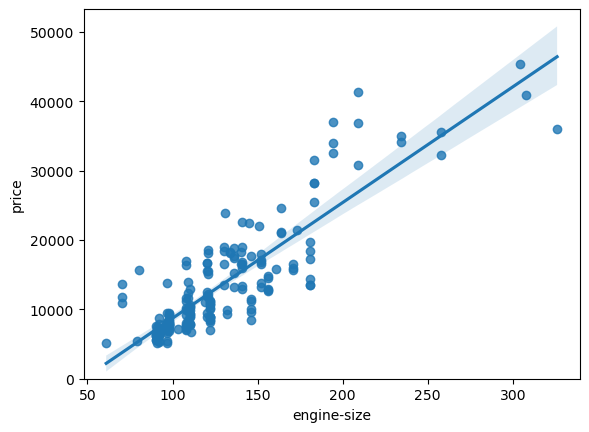

In [51]:
sns.regplot(x = df['engine-size'], y = df['price'])
plt.ylim(0,)


A medida que el tamaño del motor aumenta, el precio también aumenta: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece ser un predictor bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

Podemos examinar la correlación entre 'engine-size' y 'price' y ver que es aproximadamente `0.87`.

In [52]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Las millas por galón en carretera ("highway mpg") son una variable predictor potencial del precio. Encontremos el gráfico de dispersión de "highway-mpg" y "price".

(0.0, 48191.16808758871)

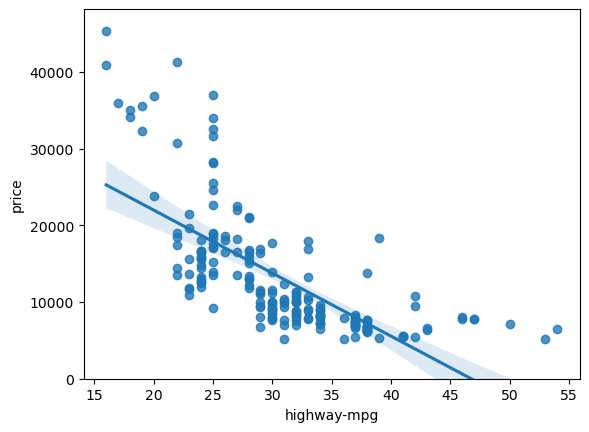

In [53]:
sns.regplot(x = df['highway-mpg'], y = df['price'] )
plt.ylim(0,)

A medida que las millas por galón en carretera ("highway mpg") aumentan, el precio disminuye: esto indica una relación inversa o negativa entre estas dos variables. Las millas por galón en carretera podrían ser un predictor potencial del precio.

Podemos revisar la correlación entre ambas y ver que es aproximadamente `-0.704`.

In [55]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Relación lineal débil

Veamos si "peak-rpm" es una variable predictora del precio "price".

(0.0, 47414.1)

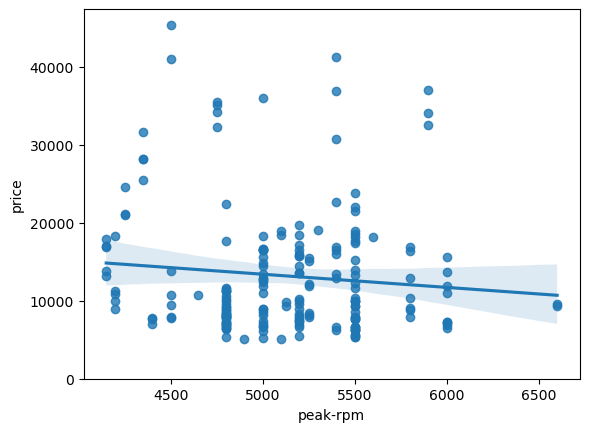

In [56]:
sns.regplot(x = df['peak-rpm'], y = df['price'])
plt.ylim(0,)

El pico de rpm ("peak rpm") no parece ser un buen predictor del precio en absoluto, ya que la línea de regresión está cerca de ser horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.

Podemos observar la correlación entre estas dos variables y ver que es aproximadamente `-0.101`.

In [57]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Vemos la correlación entre las variables "stroke" y "price".

(0.0, 47414.1)

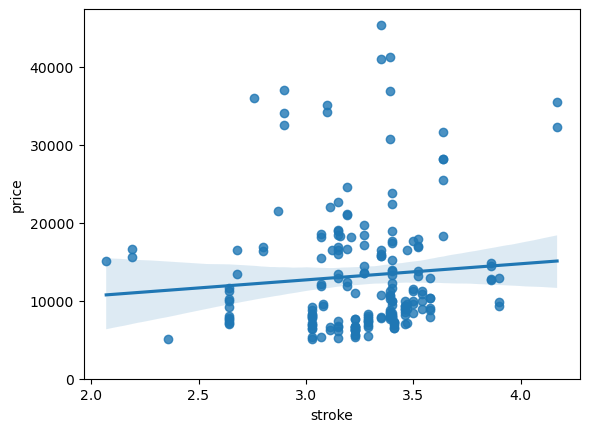

In [58]:
sns.regplot(x = df['stroke'], y = df['price'])
plt.ylim(0,)


In [59]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


La correlación muestra que stroke tampoco es una variable confiable para predictor del precio, su gráfica muestra una línea de regresión casi horizontal y sus puntos de datos se encuentran muy alejados del línea ajustada.

## Variables categóricas

Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo `object` o `int64`. Una buena manera de visualizar variables categóricas es mediante diagramas de caja `boxplots`.

Veamos la relación entre "body-style" y "price".

<Axes: xlabel='body-style', ylabel='price'>

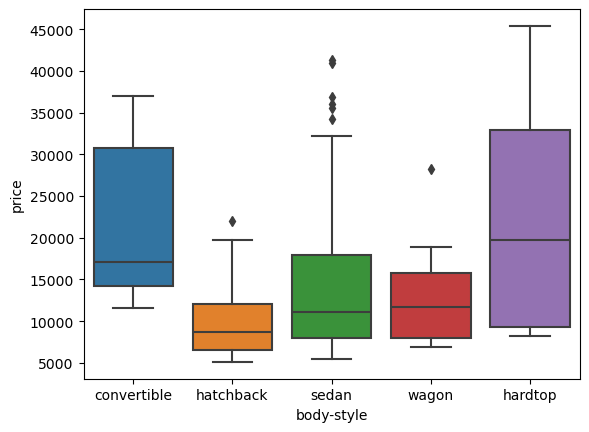

In [60]:
sns.boxplot(x="body-style", y="price", data=df)

Vemos que las distribuciones de precio entre las diferentes categorías de estilo de carrocería tienen una superposición significativa, por lo que el estilo de carrocería no sería un buen predictor del precio. Examinemos la ubicación del motor "engine-location" y el precio "price".

<Axes: xlabel='engine-location', ylabel='price'>

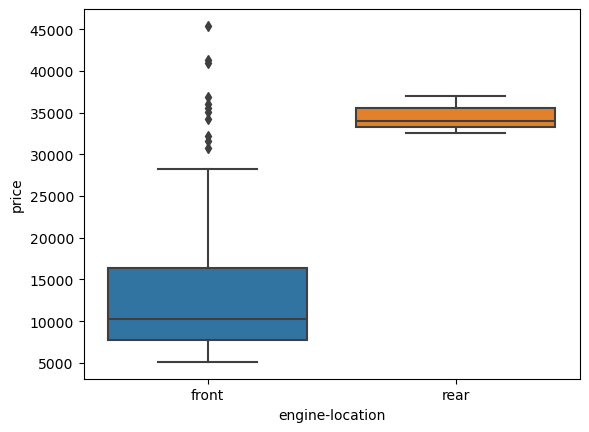

In [61]:
sns.boxplot(x="engine-location", y="price", data=df)

Aquí vemos que la distribución de precios entre estas dos categorías de ubicación del motor, delantera y trasera, son lo suficientemente distintas como para considerar la ubicación del motor como un potencial buen predictor del precio.

Examinemos "drive-wheels" y "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

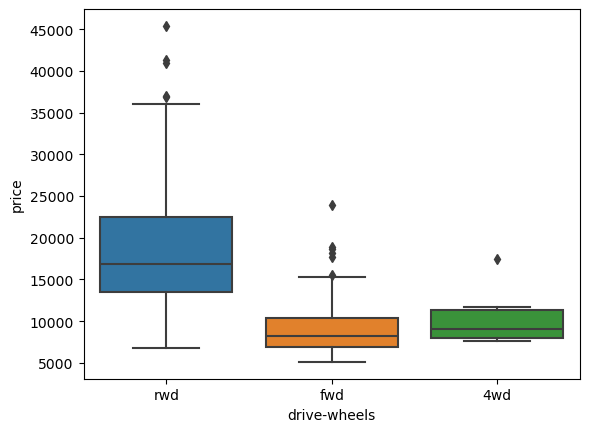

In [62]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Aquí vemos que la distribución de precios entre las diferentes categorías de "drive-wheels" difiere. Por lo tanto, "drive-wheels" podría ser potencialmente un predictor del precio.

## Análisis Estadístico Descriptivo

Primero echemos un vistazo a las variables utilizando un método de descripción.

La función `describe` calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor `NaN` se omite automáticamente en estas estadísticas.

Esto mostrará:

* el conteo de esa variable
* la media
* la desviación estándar (std)
* el valor mínimo
* el Rango Intercuartílico (IQR: 25%, 50% y 75%)
* el valor máximo

Podemos aplicar el método describe de la siguiente manera:

In [64]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Por defecto el método `describe` ignora las variables de tipo `object`, podemos aplicar este método a estas variables de la siguiente manera:

In [65]:
df.describe(include="object")

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Contar valores

El conteo de valores es una buena manera de entender cuántas unidades de cada característica/variable tenemos. Podemos aplicar el método `value_counts` en la columna "drive-wheels". No olvides que el método `value_counts` solo funciona en series de pandas, no en dataframes de pandas. Por lo tanto, solo incluimos un paréntesis `df['drive-wheels']`, no dos paréntesis `df[['drive-wheels']]`.

In [66]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Para convertir de Serie a DataFrame usamos:

In [67]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Repitamos los últimos pasos pero esta vez guardando el resultado del dataframe en una variable y renombrando la columna por defecto.

In [68]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'count':'value_counts'}, inplace=True)

In [69]:
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repitamos el proceso para la variable 'engine-location'.

In [73]:
engine_counts = df['engine-location'].value_counts().to_frame()

In [74]:
engine_counts.rename(columns={'count':'value_counts'}, inplace=True)
engine_counts

,value_counts
engine-location,
front,198
rear,3


Después de examinar el recuento de valores de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable predictora para el precio. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor en la parte delantera, por lo que este resultado está sesgado. Por lo tanto, no podemos sacar conclusiones sobre la ubicación del motor.

## Conceptos básicos de agrupación

El método `groupby` agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables, y se realiza un análisis en los grupos individuales.

Por ejemplo, vamos a agrupar la variable "drive-wheels", veremos que tiene 3 diferentes categorías.

In [76]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Si queremos saber, en promedio, qué tipo de rueda motriz es más valioso, podemos agrupar por "drive-wheels" y luego calcular el promedio.

Podemos seleccionar las columnas 'drive-wheels' y 'price', y luego asignarlas a la variable "df_group_one".

In [94]:
df_group_one = df[['drive-wheels','price']]
df_group_one.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


Ahora podemos calcular el precio promedio para cada una de las distintas categorías.

In [97]:
# agrupando resultados
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()

In [98]:
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


De nuestros datos, parece que los vehículos de tracción trasera (rwd) son, en promedio, los más caros, mientras que los de tracción en las cuatro ruedas (4wd) y en las ruedas delanteras (fwd) tienen aproximadamente el mismo precio.

También puedes agrupar por múltiples variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Esto agrupa el dataframe por la combinación única de 'drive-wheels' y 'body-style'. Podemos almacenar los resultados en la variable 'grouped_test1'.

In [99]:
# agupar resultados
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe en una tabla dinámica usando el método "pivot" para crear una tabla dinámica a partir de los grupos.

En este caso, dejaremos la variable de "drive-wheels" como las filas de la tabla y pivotaremos "body-style" para convertirla en las columnas de la tabla:

In [100]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

A menudo, es posible que no tengamos datos para algunas de las celdas de la tabla dinámica. Podemos llenar estas celdas faltantes con el valor 0, pero cualquier otro valor también podría ser utilizado. Debería mencionarse que los datos faltantes son un tema bastante complejo y constituyen un curso completo por sí mismos.

In [101]:
grouped_pivot = grouped_pivot.fillna(0) # rellena los valores con 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Agrupemos ahora las variables "body-style" para conocer su promedio en precio.

In [103]:
df_gptest2 = df[['body-style','price']]
grouped_test2 = df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Vamos graficar un mapa de calor para observar la relación entre las varaibles "body-style" y "price"

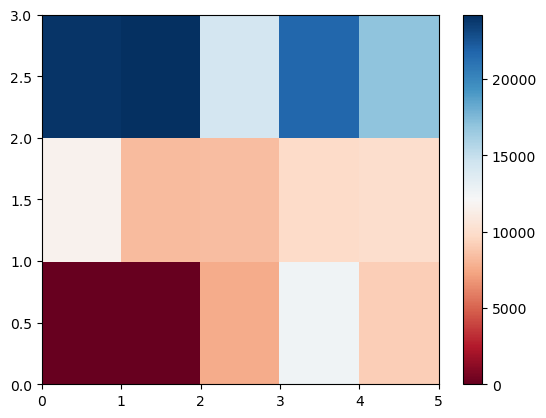

In [107]:
# Usando la tabla dinamica creada desde los datos agrupados
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El mapa de calor traza la variable objetivo (precio) proporcional al color con respecto a las variables 'drive-wheel' y 'body-style' en los ejes vertical y horizontal, respectivamente. Esto nos permite visualizar cómo se relaciona el precio con 'drive-wheel' y 'body-style'.

Las etiquetas por defecto no brindan suficiente información, vamos a cambiarlas.

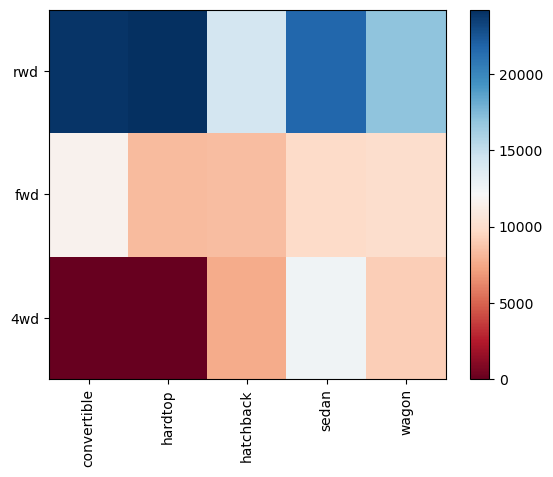

In [108]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python proporcionan una gran libertad.

La pregunta principal que queremos responder en este módulo es: "¿Cuáles son las principales características que tienen más impacto en el precio del automóvil?".

Para obtener una mejor medida de las características importantes, observamos la correlación de estas variables con el precio del automóvil. En otras palabras: ¿cómo depende el precio del automóvil de esta variable?

## Correlación y Causalidad

* Correlación: una medida del grado de interdependencia entre variables.

* Causalidad: la relación entre causa y efecto entre dos variables.

Es importante conocer la diferencia entre estas dos. La correlación no implica causalidad. Determinar la correlación es mucho más simple que determinar la causalidad, ya que esta última puede requerir experimentación independiente.

<b>Correlación de Pearson</b>


La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: Correlación lineal positiva perfecta.
* 0: No hay correlación lineal, es probable que las dos variables no se afecten entre sí.
* -1: Correlación lineal negativa perfecta.

La correlación de Pearson es el método por defecto que aplica `.corr`. Como antes podemos calcular la correlación de Pearson en variables del tipo `float` o `int`.

In [115]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0  

#### Valor P

<b>¿Qué es este valor p?</b> 

El valor p es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.

Por convención, cuando el valor p es:

* 0.001: decimos que hay una evidencia sólida de que la correlación es significativa.
* 0.05: hay evidencia moderada de que la correlación es significativa.
* 0.1: hay una evidencia débil de que la correlación es significativa.
* 0.1: no hay evidencia de que la correlación sea significativa.

Podemos obtener esta información usando el módulo `stats` de la librería de `scipy`.

In [117]:
from scipy import stats

#### Wheel-Base vs. Price

Vamos a calcular el coeficiente de la correlación de Pearson y el valor de p de las variables 'wheel-base' and 'price'.


In [118]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

El coeficiente de la correalación de Pearson es:  0.584641822265508  con un valor de P = 8.076488270732885e-20


Dado que el valor p es 0.001, la correlación entre la distancia entre ejes y el precio es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0.585).

#### Horsepower vs. Price

In [120]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

El coeficiente de la correalación de Pearson es:  0.809574567003656  con un valor de P = 6.369057428259557e-48


Dado que el valor p es 0.001, la correlación entre la potencia y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.809, cerca de 1).

#### Length vs. Price

In [121]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158868e-30


Dado que el valor p es 0.001, la correlación entre la longitud y el precio es estadísticamente significativa, y la relación lineal es moderadamente fuerte (~0.691)

#### Width vs. Price

In [122]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.20033551048144e-38



Dado que el valor p es < 0.001, la correlación entre el ancho y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.751).

#### Curb-Weight vs. Price

In [124]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893965e-53


Dado que el valor p es 0.001, la correlación entre el peso del vehículo y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.834).

#### Engine-Size vs. Price

In [125]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P = 9.265491622197359e-64


Dado que el valor p es 0.001, la correlación entre el tamaño del motor y el precio es estadísticamente significativa, y la relación lineal es muy fuerte (~0.872).

#### Bore vs. Price

In [126]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)   

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


Dado que el valor p es 0.001, la correlación entre el diámetro y el precio es estadísticamente significativa, pero la relación lineal es solo moderada (~0.521).

#### City-mpg vs. Price

In [127]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)   

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.3211320655676474e-29


Dado que el valor p es 0.001, la correlación entre el rendimiento en ciudad (city-mpg) y el precio es estadísticamente significativa, y el coeficiente de aproximadamente -0.687 muestra que la relación es negativa y moderadamente fuerte.

#### Highway-mpg vs. Price

In [128]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("El coeficiente de la correalación de Pearson es: ", pearson_coef, " con un valor de P =", p_value)   

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Dado que el valor p es menor que 0.001, la correlación entre el rendimiento en carretera (highway-mpg) y el precio es estadísticamente significativa, y el coeficiente de aproximadamente -0.705 muestra que la relación es negativa y moderadamente fuerte.

Para evitar el cálculo individual de cada variable se puede usar un bucle `for`.

In [ ]:
parameters = ['Wheel-Base','Horsepower','Length','Width','Curb-Weight','Engine-Size','Bore','City-mpg','Highway-mpg']
for params in parameters:
    print(params)
    pearson_cof, p_value = stats.pearsonr(parameters, df['Price'])
    print(f"El valor del parametro de pearson de la variable {params} es:",pearson_cof,"con un valor de p:",p_value)

### Conclusión: Variables importantes

Ahora tenemos una mejor idea de cómo se ve nuestros datos y qué variables son importantes tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:

Variables numéricas continuas:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Variables categóricas:

* Drive-wheels

Al pasar a construir modelos de aprendizaje automático para automatizar nuestro análisis, alimentar al modelo con variables que afecten significativamente nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.

<hr/>

## Autor original:
Joseph Santarcangelo

## Traducción:
Jonathan Palan

## Carga y cambios

| Fecha             |Por         |  Descripción                                  |
| -----------------| ---------------| ----------------------------------------------|
| 2024-05-06     | Jonathan Palan | Traducción curso Data Analysis with Python|

## Bibliografía

[1] IBM,"Data Analysis with Python", available: https://www.coursera.org/learn/data-analysis-with-python, Skills Network
<hr/>